# Exercise 1
By: Jorge Aranda (800839) and Alberto Zafra (876628)

## imports

In [11]:
from __future__ import absolute_import, division, print_function, unicode_literals
import random
import numpy as np  # Make numpy available using np.
from matplotlib import pyplot as plt # Plotting of the graph
from bot import bot
import plotter


## main

In [5]:
# basic initialization
N_bots = 5
N_iterations = 2000
update_period = 0.1
step_size = 0.004
initial_pos = np.linspace(-5, 5,num=11)
#print(initial_pos)
connections = [[0, 1], [0, 2], [1,2], [2, 3], [4,1]]
# [[0, 1], [0, 2], [1,2], [2, 3]]
robot_evolution_x = np.zeros(N_bots)
robot_evolution_y = np.zeros(N_bots)


In [13]:
# Bots initialization
bots = []

for i in range(N_bots):
    pos = ([random.choice(initial_pos),random.choice(initial_pos)])
    bots.append(bot(i,[],pos,update_period,step_size))
    # Store the positions of the robots
    robot_evolution_x[i] = pos[0]
    robot_evolution_y[i] = pos[1]

for conn in connections:
    bots[conn[0]].add_neighbor(bots[conn[1]])
    bots[conn[1]].add_neighbor(bots[conn[0]])

for it in range(N_iterations):
    # store its evolution
    if(it>0):
        x = robot_evolution_x[-1]
        y = robot_evolution_y[-1]
    else:
        x = robot_evolution_x
        y = robot_evolution_y
        
        
    for b in bots:
       id1, pos1, id2, pos2 = b.step_rendevous()
           
       x[id1] = pos1[0]
       x[id2] = pos2[0]
       
       
       y[id1] = pos1[1]
       y[id2] = pos2[1]
       
    robot_evolution_x = np.vstack((robot_evolution_x,x))
    robot_evolution_y = np.vstack((robot_evolution_y,y))   



In [14]:
print(np.shape(robot_evolution_y))

(2253, 5)


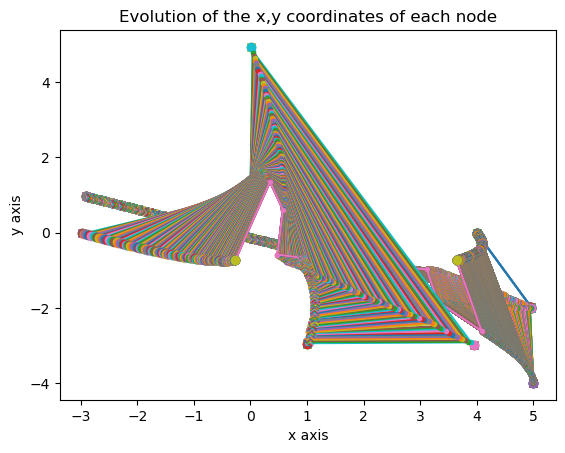

In [15]:
# Plot the results
plotter.plot_evolutionxy(robot_evolution_x,robot_evolution_y)

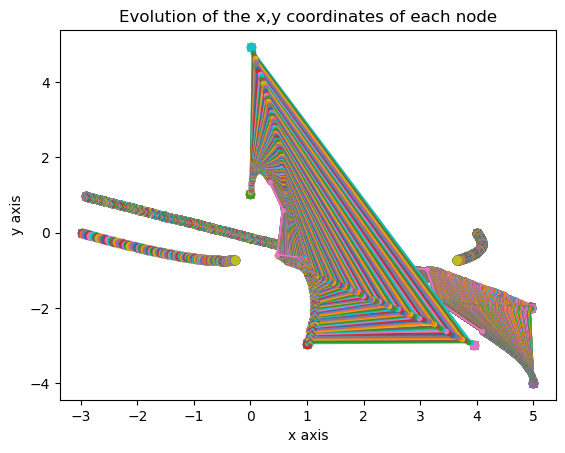

In [16]:
# Video?
plotter.plot_evolutionxy_video(robot_evolution_x,robot_evolution_y)